# Workshop 2 - Predicting loan cases using Decision Tree

### Student Number: 2302546


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("train_ctrUa4K.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.ndim

2

# Generating unique dataset for this task
## I will be generating a unique dataset for this notebook using the last two digits of my student number in the random_state.

In [6]:
dataset.size

7982

In [7]:
dataset = dataset.sample(n=550, random_state = 46)

In [8]:
dataset.to_csv('Arabambi_2302546.csv')

In [9]:
data = pd.read_csv('Arabambi_2302546.csv')

In [10]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,273,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
1,246,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
2,371,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
3,538,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N
4,288,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y


In [11]:
data=data.drop('Unnamed: 0', axis = 1)

In [12]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N
4,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y


# Data Visualization

# Q1. Use and explain the following DataFrame functions/properties on your data.
- describe()
- size
- ndim
- shape

In [13]:
print(data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       550.000000         550.000000  531.000000        537.000000   
mean       5497.836364        1610.992582  148.527307        341.787709   
std        6263.552850        2938.590680   88.188674         64.796521   
min         150.000000           0.000000    9.000000         12.000000   
25%        2843.000000           0.000000  100.000000        360.000000   
50%        3815.000000        1149.000000  128.000000        360.000000   
75%        5844.000000        2297.250000  170.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      506.000000  
mean         0.839921  
std          0.367042  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


The describe() function is a pandas DataFrame method used to generate descriptive statistics of a DataFrame. It computes the count, mean, standard deviation, minimum and maximum values, as well as the quartiles (25%, 50%, and 75%) of each numerical column in the DataFrame.

In the given DataFrame, data.describe() has generated the summary statistics for all the columns present in the DataFrame, including Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status, LoanAmount_log, Loan_Amount_Term_log, and TotalIncome.

In [14]:
data.size

7150

'data.size' is a property of the DataFrame object in pandas which returns the number of elements in the DataFrame. This property returns the same value as the product of the number of rows and columns in the DataFrame. In other words, it returns the total number of cells or entries in the DataFrame.

In the code above, 'data.size' returns the total number of elements in the 'data' DataFrame, which is equal to 7150.

In [15]:
data.ndim

2

data.ndim returns the number of dimensions of the dataframe or axes of the DataFrame. For this pandas dataframe, it returns 2, as it is a 2-dimensional data structure.

In [16]:
data.shape

(550, 13)

data.shape returns the dimensions of the dataframe in the form of a tuple. The first element shows the number of rows(550) and the second element shows the number of columns(13) in the dataframe.

# Q2. Is there any difference between dimensions of the original dataset and the new dataset? If yes, what is the difference?

Yes, there are differences between the dimensions of the old and new datasets(Comparing In[4] and In[6] to In[14] and In[16]). The size and shape of the data set has been altered in In[7]. However, the dimensions (ndim) remains the same.

# Q3. What are the possible values 'Education' can take? Write code to display all the possible values of 'Education'.

In [17]:
print(data['Education'].unique())


['Graduate' 'Not Graduate']


In [18]:
data['Education'].value_counts()

Graduate        438
Not Graduate    112
Name: Education, dtype: int64

The values 'Education' can take is 
 - Graduate
 - Not Graduate 
 
 In[17] and In[18] shows this.

# Data Analysis

In [19]:
columns = data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N
4,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y


<AxesSubplot:>

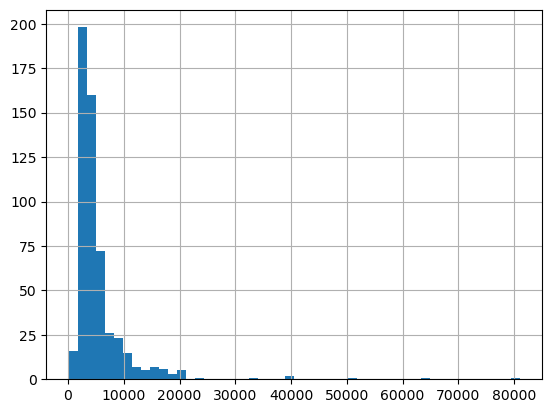

In [21]:
data['ApplicantIncome'].hist(bins=50)

# Q4. Use boxplot and histogram on 'ApplicantIncome' to visualise its distribution.

  Histogram and boxplot are used on the same feature to visualise the data distribution. Compare both the plots and report:

  4a. What are the extreme values? Are there any outliers(s) exist in this dataset? Explain with example based on the 'ApplicantIncome'? 

  4b. Are the results of both the plots comparable? Are there any differences in the two plots? What are the key differences?
 
 ## Answer

<AxesSubplot:>

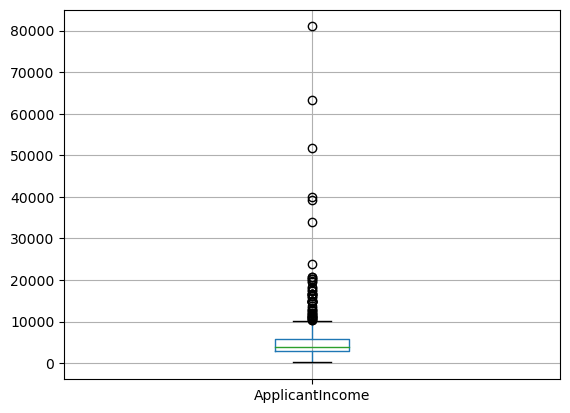

In [22]:
data.boxplot(column='ApplicantIncome')

<AxesSubplot:>

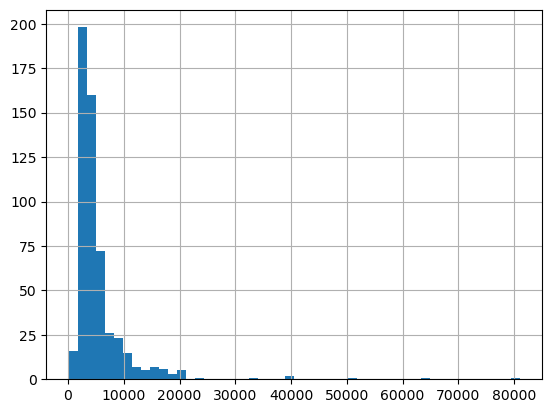

In [23]:
data['ApplicantIncome'].hist(bins=50)

Q4a. Extreme Values defines the boundaries of a normal distribution, any data that falls outside the maximum and minimum point in the normal distribution is reffered to as an outlier.
There are several outliers in the dataset all coming in above the maximum value of this dataset at 10000+ as show in Out[22]

Q4b. Both the plots give different information about the distribution of the data. The histogram shows the frequency distribution of the data, while the boxplot shows the summary statistics such as median, first and third quartile, and outliers. The histogram gives a rough idea of the data distribution, while the boxplot gives a more concise and compact representation of the data distribution especially when defining the boundaries and identifying the outliers present in the dataset. 

# Try-It-Yourself
## Use Histogram and Box plot on 'LoanAmount' and observe extreme values

<AxesSubplot:>

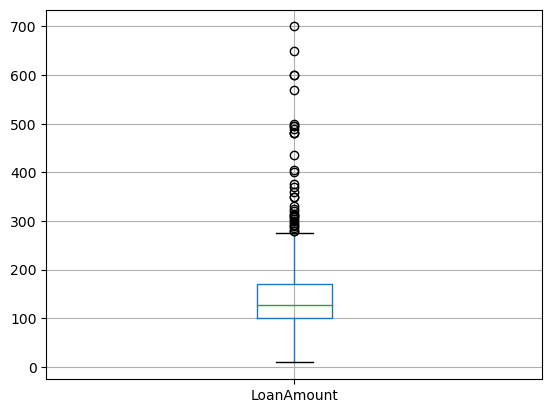

In [24]:
#Box plot
data.boxplot(column='LoanAmount')

<AxesSubplot:>

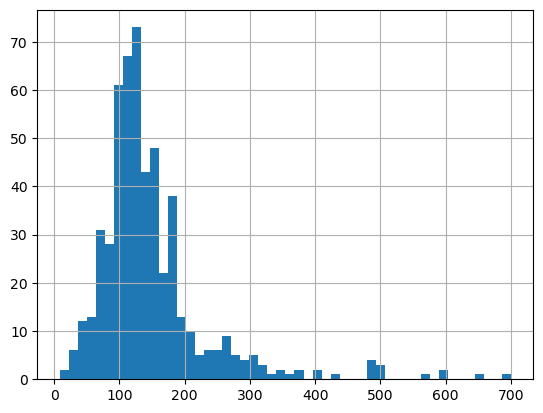

In [25]:
#Histogram
data['LoanAmount'].hist(bins=50)

Extreme values for LoanAmount can be observed using the boxplot and histogram, the extreme values are about 10 and 270. Also, median is about 120 in the box plot. The box plotshows these value way more noticeably than the histogram.

# Categorical Variable Analysis

In [26]:
data['Credit_History'].value_counts()

1.0    425
0.0     81
Name: Credit_History, dtype: int64

In [27]:
credit_history = data['Credit_History'].value_counts(ascending=True)
 
loan_probability = data.pivot_table(values='Loan_Status', index=['Credit_History'],
                       aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
 
print('Frequency Table for Credit History:')
print(credit_history)
print('\nProbability of getting loan for each Credit History class:')
print(loan_probability)

Frequency Table for Credit History:
0.0     81
1.0    425
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.086420
1.0                0.790588


In [28]:
data['Loan_Status'].value_counts()

Y    376
N    174
Name: Loan_Status, dtype: int64

In [29]:
data.shape

(550, 13)

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N
4,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y


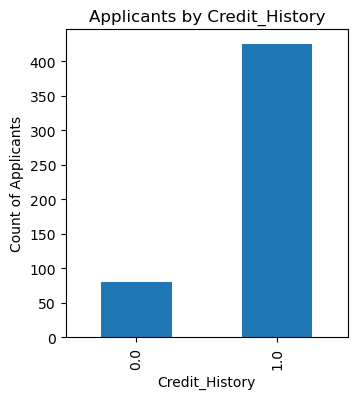

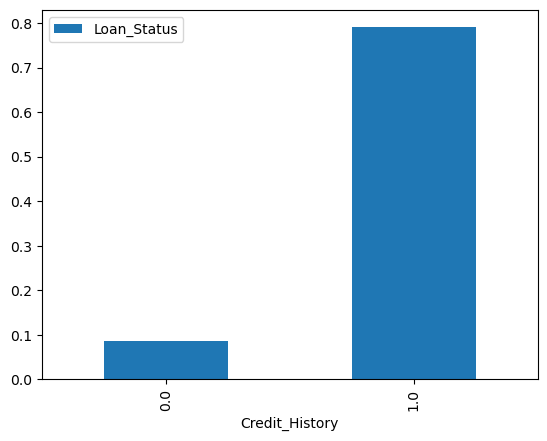

In [31]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
credit_history.plot(kind='bar')
plt.show()
 
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
loan_probability.plot(kind = 'bar')
plt.show()

# Data Pre-Processing

In [32]:
data['Gender'].value_counts()

Male      437
Female    100
Name: Gender, dtype: int64

### Filling in missing values by mean

In [33]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           13
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     13
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N
4,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y


In [35]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [36]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N
4,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y


In [37]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           13
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     13
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
data.shape

(550, 13)

In [39]:
data.to_csv('new_train.csv')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='[Education, Self_Employed]'>

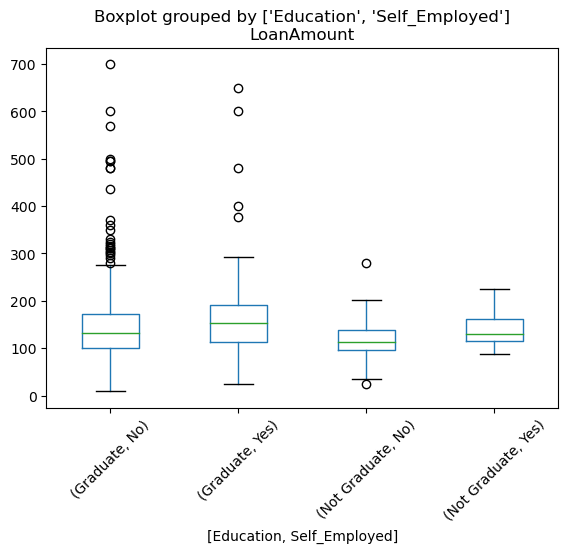

In [40]:
data.boxplot(column='LoanAmount', by = ['Education','Self_Employed'],
             grid=False, rot = 45, fontsize = 10)

In [41]:
data['Self_Employed'].value_counts()

No     445
Yes     77
Name: Self_Employed, dtype: int64

In [42]:
data['Self_Employed'].fillna('No', inplace=True)

In [43]:
data['Self_Employed'].value_counts()

No     473
Yes     77
Name: Self_Employed, dtype: int64

In [44]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           13
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     13
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,550.000000,537.000000,506.000000
mean,5497.836364,1610.992582,148.527307,341.787709,0.839921
std,6263.552850,2938.590680,86.649203,64.796521,0.367042
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.000000,0.000000,101.250000,360.000000,1.000000
50%,3815.000000,1149.000000,130.000000,360.000000,1.000000
75%,5844.000000,2297.250000,167.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Treating outliers in the dataset

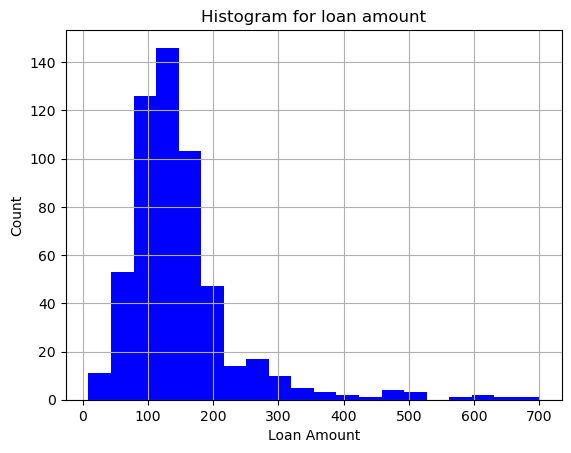

In [46]:
plt.hist(data['LoanAmount'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

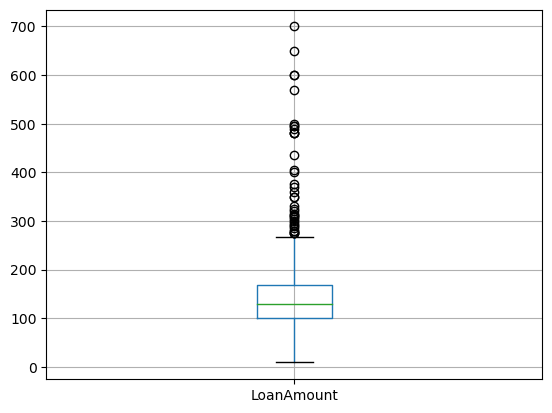

In [47]:
data.boxplot(column='LoanAmount')

In [48]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
#data['LoanAmount_log'].hist(bins = 20)

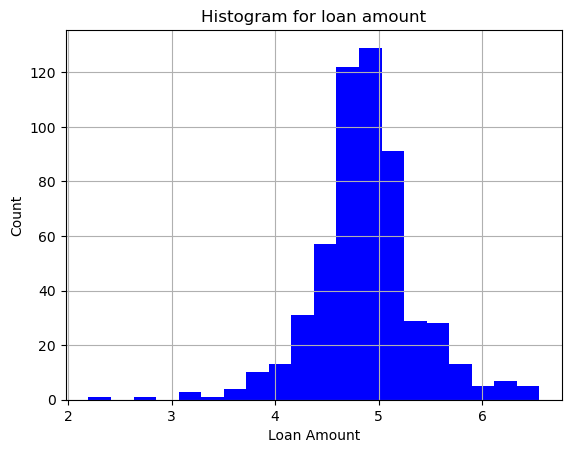

In [49]:
plt.hist(data['LoanAmount_log'], 20, facecolor='b')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Histogram for loan amount')
plt.grid(True)
plt.show()

<AxesSubplot:>

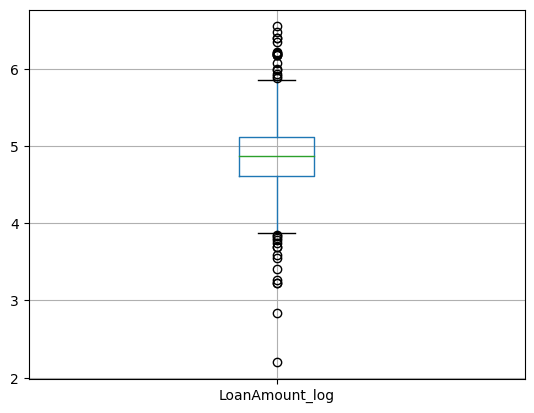

In [50]:
data.boxplot(column='LoanAmount_log')

In [51]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y,5.010635
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112.0,360.0,1.0,Urban,Y,4.718499
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y,5.043425
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,66.0,360.0,1.0,Rural,N,4.189655
4,LP001931,Female,No,0,Graduate,No,4124,0.0,115.0,360.0,1.0,Semiurban,Y,4.744932


In [52]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log
count,550.000000,550.000000,550.000000,537.000000,506.000000,550.000000
mean,5497.836364,1610.992582,148.527307,341.787709,0.839921,4.872758
std,6263.552850,2938.590680,86.649203,64.796521,0.367042,0.503418
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225
25%,2843.000000,0.000000,101.250000,360.000000,1.000000,4.617584
50%,3815.000000,1149.000000,130.000000,360.000000,1.000000,4.867534
75%,5844.000000,2297.250000,167.750000,360.000000,1.000000,5.122471
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080


In [53]:
data = data.drop(['LoanAmount'], axis=1)

# Try it yourself
I am checking outliers in "Loan_Amount_Term" and treating it with log transformation.

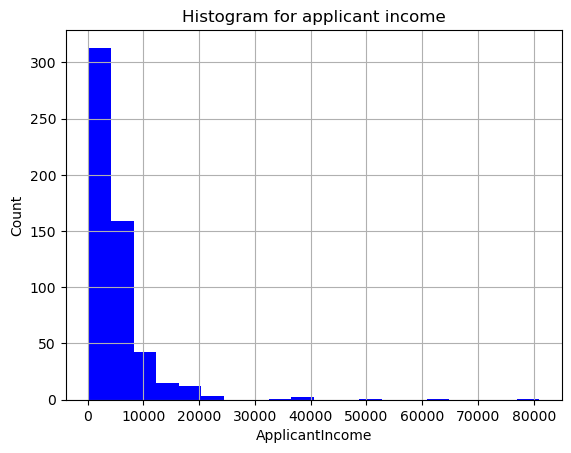

In [54]:
plt.hist(data['ApplicantIncome'], 20, facecolor='b')
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.title('Histogram for applicant income')
plt.grid(True)
plt.show()

<AxesSubplot:>

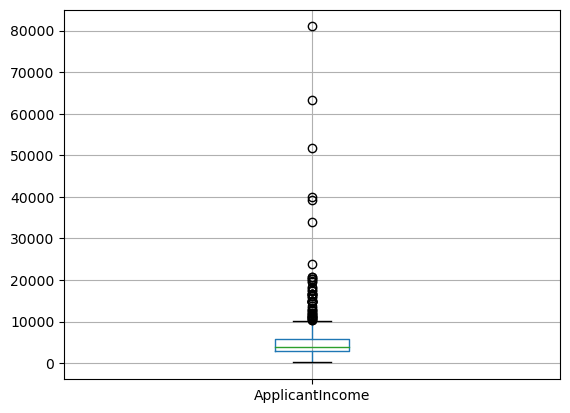

In [55]:
data.boxplot(column='ApplicantIncome')

In [56]:
data['ApplicantIncome_log'] = np.log(data['ApplicantIncome'])

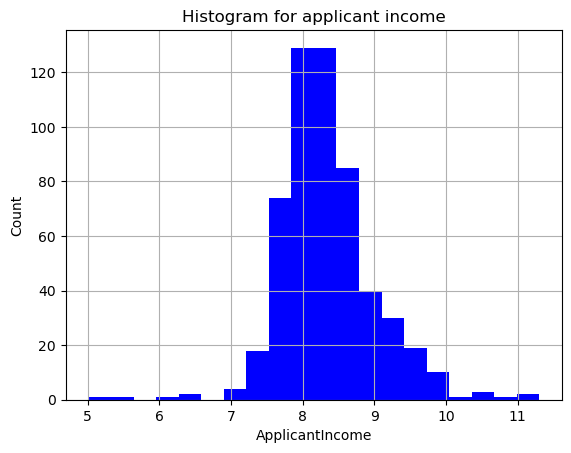

In [57]:
plt.hist(data['ApplicantIncome_log'], 20, facecolor='b')
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.title('Histogram for applicant income')
plt.grid(True)
plt.show()

<AxesSubplot:>

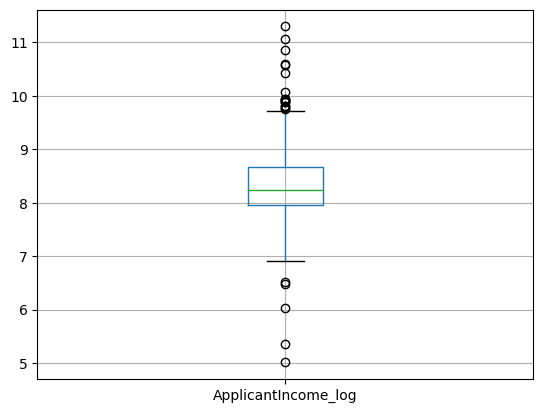

In [58]:
data.boxplot(column='ApplicantIncome_log')

In [59]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,360.0,1.0,Semiurban,Y,5.010635,7.870930
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,360.0,1.0,Urban,Y,4.718499,9.180190
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,360.0,1.0,Semiurban,Y,5.043425,8.553525
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,360.0,1.0,Rural,N,4.189655,7.978311
4,LP001931,Female,No,0,Graduate,No,4124,0.0,360.0,1.0,Semiurban,Y,4.744932,8.324579
5,LP002387,Male,Yes,0,Graduate,No,2425,2340.0,360.0,1.0,Semiurban,Y,4.962845,7.793587
6,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,360.0,1.0,Rural,N,4.890349,8.494334
7,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,360.0,1.0,Semiurban,Y,3.258097,8.606668
8,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,360.0,NaN,Semiurban,Y,5.075174,7.641564
9,LP001137,Female,No,0,Graduate,No,3410,0.0,NaN,1.0,Urban,Y,4.477337,8.134468


In [60]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,ApplicantIncome_log
count,550.000000,550.000000,537.000000,506.000000,550.000000,550.000000
mean,5497.836364,1610.992582,341.787709,0.839921,4.872758,8.349362
std,6263.552850,2938.590680,64.796521,0.367042,0.503418,0.661856
min,150.000000,0.000000,12.000000,0.000000,2.197225,5.010635
25%,2843.000000,0.000000,360.000000,1.000000,4.617584,7.952597
50%,3815.000000,1149.000000,360.000000,1.000000,4.867534,8.246696
75%,5844.000000,2297.250000,360.000000,1.000000,5.122471,8.673170
max,81000.000000,41667.000000,480.000000,1.000000,6.551080,11.302204


In [61]:
data['TotalIncome']=(data['ApplicantIncome']+data['CoapplicantIncome'])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,360.0,1.0,Semiurban,Y,5.010635,7.870930,4843.0
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,360.0,1.0,Urban,Y,4.718499,9.180190,9703.0
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,360.0,1.0,Semiurban,Y,5.043425,8.553525,5185.0
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,360.0,1.0,Rural,N,4.189655,7.978311,3453.0
4,LP001931,Female,No,0,Graduate,No,4124,0.0,360.0,1.0,Semiurban,Y,4.744932,8.324579,4124.0


In [62]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
                            #0:gets the mode of each column, 1: for each row
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [63]:
data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
LoanAmount_log         0
ApplicantIncome_log    0
TotalIncome            0
dtype: int64

In [64]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,360.0,1.0,Semiurban,Y,5.010635,7.870930,4843.0
1,LP001814,Male,Yes,2,Graduate,No,9703,0.0,360.0,1.0,Urban,Y,4.718499,9.180190,9703.0
2,LP002197,Male,Yes,2,Graduate,No,5185,0.0,360.0,1.0,Semiurban,Y,5.043425,8.553525,5185.0
3,LP002739,Male,Yes,0,Not Graduate,No,2917,536.0,360.0,1.0,Rural,N,4.189655,7.978311,3453.0
4,LP001931,Female,No,0,Graduate,No,4124,0.0,360.0,1.0,Semiurban,Y,4.744932,8.324579,4124.0


In [65]:
data.shape

(550, 15)

# Q5. Use LabelEncoder, to convert categorical variables into numeric. Hint: You will first need to identify categorial values.

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
columns = list(data) 
print(columns)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'LoanAmount_log', 'ApplicantIncome_log', 'TotalIncome']


In [68]:
data.dtypes

Loan_ID                 object
Gender                  object
Married                 object
Dependents              object
Education               object
Self_Employed           object
ApplicantIncome          int64
CoapplicantIncome      float64
Loan_Amount_Term       float64
Credit_History         float64
Property_Area           object
Loan_Status             object
LoanAmount_log         float64
ApplicantIncome_log    float64
TotalIncome            float64
dtype: object

In [69]:
columns = list(data.select_dtypes(exclude=['float64','int64']))

In [70]:
c_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Loan_Status']

In [71]:
le = LabelEncoder()
for i in c_columns:
    #print(i)
    data[i] = le.fit_transform(data[i])

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,LP001894,1,1,0,0,0,2620,2223.0,360.0,1.0,1,1,5.010635,7.870930,4843.0
1,LP001814,1,1,2,0,0,9703,0.0,360.0,1.0,2,1,4.718499,9.180190,9703.0
2,LP002197,1,1,2,0,0,5185,0.0,360.0,1.0,1,1,5.043425,8.553525,5185.0
3,LP002739,1,1,0,1,0,2917,536.0,360.0,1.0,0,0,4.189655,7.978311,3453.0
4,LP001931,0,0,0,0,0,4124,0.0,360.0,1.0,1,1,4.744932,8.324579,4124.0


I excluded the 'Loan_ID' from been encoded as it is a unique list of identifiers for each Loan

In [73]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [74]:
original_data = data.copy()
original_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,LP001894,1,1,0,0,0,2620,2223.0,360.0,1.0,1,1,5.010635,7.870930,4843.0
1,LP001814,1,1,2,0,0,9703,0.0,360.0,1.0,2,1,4.718499,9.180190,9703.0
2,LP002197,1,1,2,0,0,5185,0.0,360.0,1.0,1,1,5.043425,8.553525,5185.0
3,LP002739,1,1,0,1,0,2917,536.0,360.0,1.0,0,0,4.189655,7.978311,3453.0
4,LP001931,0,0,0,0,0,4124,0.0,360.0,1.0,1,1,4.744932,8.324579,4124.0


In [75]:
original_data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,LP001894,1,1,0,0,0,2620,2223.0,360.0,1.0,1,1,5.010635,7.870930,4843.0
1,LP001814,1,1,2,0,0,9703,0.0,360.0,1.0,2,1,4.718499,9.180190,9703.0
2,LP002197,1,1,2,0,0,5185,0.0,360.0,1.0,1,1,5.043425,8.553525,5185.0
3,LP002739,1,1,0,1,0,2917,536.0,360.0,1.0,0,0,4.189655,7.978311,3453.0
4,LP001931,0,0,0,0,0,4124,0.0,360.0,1.0,1,1,4.744932,8.324579,4124.0


In [76]:
data[0:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,LP001894,1,1,0,0,0,2620,2223.0,360.0,1.0,1,1,5.010635,7.870930,4843.0
1,LP001814,1,1,2,0,0,9703,0.0,360.0,1.0,2,1,4.718499,9.180190,9703.0
2,LP002197,1,1,2,0,0,5185,0.0,360.0,1.0,1,1,5.043425,8.553525,5185.0
3,LP002739,1,1,0,1,0,2917,536.0,360.0,1.0,0,0,4.189655,7.978311,3453.0
4,LP001931,0,0,0,0,0,4124,0.0,360.0,1.0,1,1,4.744932,8.324579,4124.0


In [77]:
data_for_norm = data.drop(['Loan_ID','Loan_Status'], axis=1)

In [78]:
normalized_data = normalize( data_for_norm )

In [79]:
print(normalized_data[0:5])

[[1.68095792e-04 1.68095792e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40410974e-01 3.73676945e-01 6.05144850e-02
  1.68095792e-04 1.68095792e-04 8.42266706e-04 1.32307014e-03
  8.14087919e-01]
 [7.28499787e-05 7.28499787e-05 1.45699957e-04 0.00000000e+00
  0.00000000e+00 7.06863344e-01 0.00000000e+00 2.62259923e-02
  7.28499787e-05 1.45699957e-04 3.43742542e-04 6.68776675e-04
  7.06863344e-01]
 [1.36211271e-04 1.36211271e-04 2.72422541e-04 0.00000000e+00
  0.00000000e+00 7.06255438e-01 0.00000000e+00 4.90360574e-02
  1.36211271e-04 1.36211271e-04 6.86971343e-04 1.16508652e-03
  7.06255438e-01]
 [2.19006276e-04 2.19006276e-04 0.00000000e+00 2.19006276e-04
  0.00000000e+00 6.38841307e-01 1.17387364e-01 7.88422593e-02
  2.19006276e-04 0.00000000e+00 9.17560683e-04 1.74730017e-03
  7.56228671e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.05762571e-01 0.00000000e+00 6.16087598e-02
  1.71135444e-04 1.71135444e-04 8.12026066e-04 1.42463050e-0

In [80]:
normalized_data.shape

(550, 13)

In [81]:
data.shape

(550, 15)

In [82]:
normalized_data = pd.DataFrame(normalized_data, columns=data_for_norm.columns)

In [83]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,0.000168,0.000168,0.000000,0.000000,0.0,0.440411,0.373677,0.060514,0.000168,0.000168,0.000842,0.001323,0.814088
1,0.000073,0.000073,0.000146,0.000000,0.0,0.706863,0.000000,0.026226,0.000073,0.000146,0.000344,0.000669,0.706863
2,0.000136,0.000136,0.000272,0.000000,0.0,0.706255,0.000000,0.049036,0.000136,0.000136,0.000687,0.001165,0.706255
3,0.000219,0.000219,0.000000,0.000219,0.0,0.638841,0.117387,0.078842,0.000219,0.000000,0.000918,0.001747,0.756229
4,0.000000,0.000000,0.000000,0.000000,0.0,0.705763,0.000000,0.061609,0.000171,0.000171,0.000812,0.001425,0.705763


In [84]:
normalized_data['Loan_ID'] = data['Loan_ID'] 

In [85]:
normalized_data['Loan_Status'] = data['Loan_Status']

In [86]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,TotalIncome,Loan_ID,Loan_Status
0,0.000168,0.000168,0.000000,0.000000,0.0,0.440411,0.373677,0.060514,0.000168,0.000168,0.000842,0.001323,0.814088,LP001894,1
1,0.000073,0.000073,0.000146,0.000000,0.0,0.706863,0.000000,0.026226,0.000073,0.000146,0.000344,0.000669,0.706863,LP001814,1
2,0.000136,0.000136,0.000272,0.000000,0.0,0.706255,0.000000,0.049036,0.000136,0.000136,0.000687,0.001165,0.706255,LP002197,1
3,0.000219,0.000219,0.000000,0.000219,0.0,0.638841,0.117387,0.078842,0.000219,0.000000,0.000918,0.001747,0.756229,LP002739,0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.705763,0.000000,0.061609,0.000171,0.000171,0.000812,0.001425,0.705763,LP001931,1


In [87]:
normalized_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,TotalIncome,Loan_Status
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.000115,0.000090,0.000101,0.000035,0.000016,0.574214,0.182656,0.049981,0.000124,0.000154,0.000688,0.001183,0.756870,0.683636
std,0.000079,0.000082,0.000160,0.000075,0.000046,0.149447,0.190539,0.025370,0.000080,0.000154,0.000278,0.000485,0.048901,0.465480
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.007024,0.000000,0.001298,0.000000,0.000000,0.000051,0.000099,0.696334,0.000000
25%,0.000059,0.000000,0.000000,0.000000,0.000000,0.465190,0.000000,0.031111,0.000070,0.000000,0.000500,0.000847,0.706467,0.000000
50%,0.000120,0.000091,0.000000,0.000000,0.000000,0.619191,0.150488,0.049439,0.000129,0.000136,0.000678,0.001178,0.760806,1.000000
75%,0.000168,0.000153,0.000175,0.000000,0.000000,0.706149,0.346492,0.063291,0.000174,0.000236,0.000843,0.001449,0.809524,1.000000
max,0.000483,0.000373,0.001148,0.000483,0.000323,0.707105,0.703565,0.173842,0.000483,0.000966,0.001914,0.003512,0.816215,1.000000


# For Fun

<AxesSubplot:>

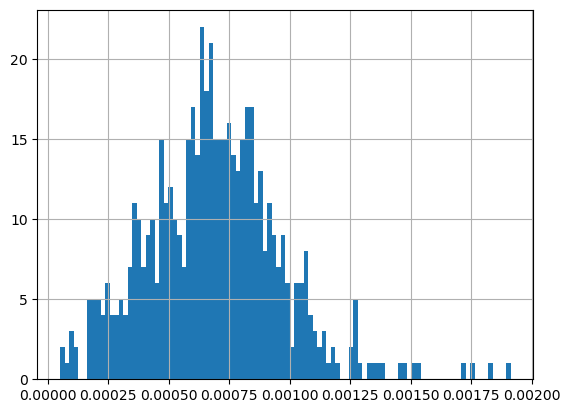

In [88]:
normalized_data['LoanAmount_log'].hist(bins=100)

In [89]:
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import ConfusionMatrixDisplay
#import pydotplus

In [90]:
columns = list(normalized_data.columns) 
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'ApplicantIncome_log',
 'TotalIncome',
 'Loan_ID',
 'Loan_Status']

In [91]:
normalized_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,TotalIncome,Loan_ID,Loan_Status
0,0.000168,0.000168,0.000000,0.000000,0.0,0.440411,0.373677,0.060514,0.000168,0.000168,0.000842,0.001323,0.814088,LP001894,1
1,0.000073,0.000073,0.000146,0.000000,0.0,0.706863,0.000000,0.026226,0.000073,0.000146,0.000344,0.000669,0.706863,LP001814,1
2,0.000136,0.000136,0.000272,0.000000,0.0,0.706255,0.000000,0.049036,0.000136,0.000136,0.000687,0.001165,0.706255,LP002197,1
3,0.000219,0.000219,0.000000,0.000219,0.0,0.638841,0.117387,0.078842,0.000219,0.000000,0.000918,0.001747,0.756229,LP002739,0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.705763,0.000000,0.061609,0.000171,0.000171,0.000812,0.001425,0.705763,LP001931,1


In [92]:
features = normalized_data.drop(['Loan_ID','Loan_Status'], axis = 1)

classes = pd.DataFrame(normalized_data['Loan_Status'])

In [93]:
print('Features:')
print(features.head())
 
print('Classes:')
print(classes.head())

Features:
     Gender   Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0  0.000168  0.000168    0.000000   0.000000            0.0         0.440411   
1  0.000073  0.000073    0.000146   0.000000            0.0         0.706863   
2  0.000136  0.000136    0.000272   0.000000            0.0         0.706255   
3  0.000219  0.000219    0.000000   0.000219            0.0         0.638841   
4  0.000000  0.000000    0.000000   0.000000            0.0         0.705763   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  \
0           0.373677          0.060514        0.000168       0.000168   
1           0.000000          0.026226        0.000073       0.000146   
2           0.000000          0.049036        0.000136       0.000136   
3           0.117387          0.078842        0.000219       0.000000   
4           0.000000          0.061609        0.000171       0.000171   

   LoanAmount_log  ApplicantIncome_log  TotalIncome  
0        0.00084

In [94]:
normalized_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,ApplicantIncome_log,TotalIncome,Loan_ID,Loan_Status
0,0.000168,0.000168,0.000000,0.000000,0.00000,0.440411,0.373677,0.060514,0.000168,0.000168,0.000842,0.001323,0.814088,LP001894,1
1,0.000073,0.000073,0.000146,0.000000,0.00000,0.706863,0.000000,0.026226,0.000073,0.000146,0.000344,0.000669,0.706863,LP001814,1
2,0.000136,0.000136,0.000272,0.000000,0.00000,0.706255,0.000000,0.049036,0.000136,0.000136,0.000687,0.001165,0.706255,LP002197,1
3,0.000219,0.000219,0.000000,0.000219,0.00000,0.638841,0.117387,0.078842,0.000219,0.000000,0.000918,0.001747,0.756229,LP002739,0
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.705763,0.000000,0.061609,0.000171,0.000171,0.000812,0.001425,0.705763,LP001931,1
5,0.000171,0.000171,0.000000,0.000000,0.00000,0.414720,0.400183,0.061567,0.000171,0.000171,0.000849,0.001333,0.814903,LP002387,1
6,0.000144,0.000144,0.000000,0.000144,0.00000,0.706149,0.000000,0.052018,0.000144,0.000000,0.000707,0.001227,0.706149,LP001038,0
7,0.000117,0.000117,0.000117,0.000000,0.00000,0.638480,0.120503,0.042036,0.000117,0.000117,0.000380,0.001005,0.758983,LP002792,1
8,0.000130,0.000130,0.000000,0.000000,0.00013,0.270819,0.530846,0.046805,0.000130,0.000130,0.000660,0.000994,0.801665,LP002478,1
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.705143,0.000000,0.074443,0.000207,0.000414,0.000926,0.001682,0.705143,LP001137,1


In [95]:
normalized_data.shape

(550, 15)

In [96]:
normalized_data.shape

(550, 15)

In [97]:
from matplotlib import pyplot

In [98]:
x_train, x_test, y_train, y_test = train_test_split(features, classes, test_size= .33, 
                                                    random_state = 46)
 
print(x_train.shape, x_test.shape)

(368, 13) (182, 13)


In [99]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [100]:
dtc_model = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.09070
Feature: 1, Score: 0.08610
Feature: 2, Score: 0.01503
Feature: 3, Score: 0.01095
Feature: 4, Score: 0.05621
Feature: 5, Score: 0.04769
Feature: 6, Score: 0.02707
Feature: 7, Score: 0.07054
Feature: 8, Score: 0.32666
Feature: 9, Score: 0.04490
Feature: 10, Score: 0.06708
Feature: 11, Score: 0.10648
Feature: 12, Score: 0.05058


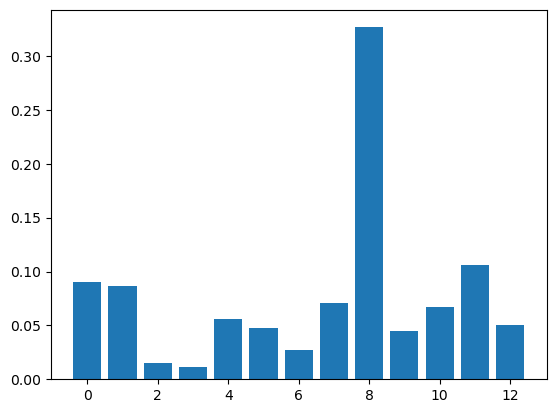

In [101]:
# feature importance
importance = dtc_model.feature_importances_
 
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
 
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [102]:
prediction = dtc_model.predict(x_test) 

In [103]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

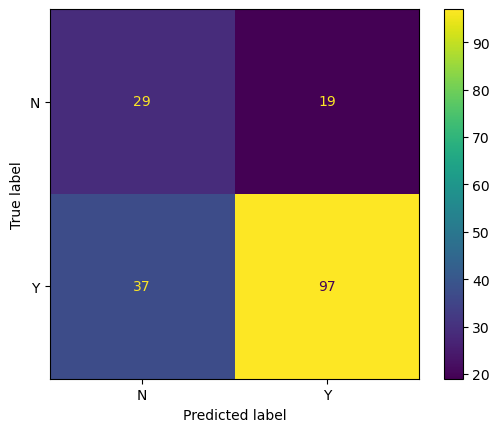

In [104]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [105]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.44      0.60      0.51        48
           Y       0.84      0.72      0.78       134

    accuracy                           0.69       182
   macro avg       0.64      0.66      0.64       182
weighted avg       0.73      0.69      0.71       182



In [106]:
graphviz_path = 'C:/Program Files/Graphviz/bin/'

In [107]:
import os
 
os.environ["PATH"] += os.pathsep + graphviz_path

In [108]:
from graphviz import Source
from sklearn import tree
graph = Source( tree.export_graphviz(dtc_model, out_file=None, feature_names=features.columns))

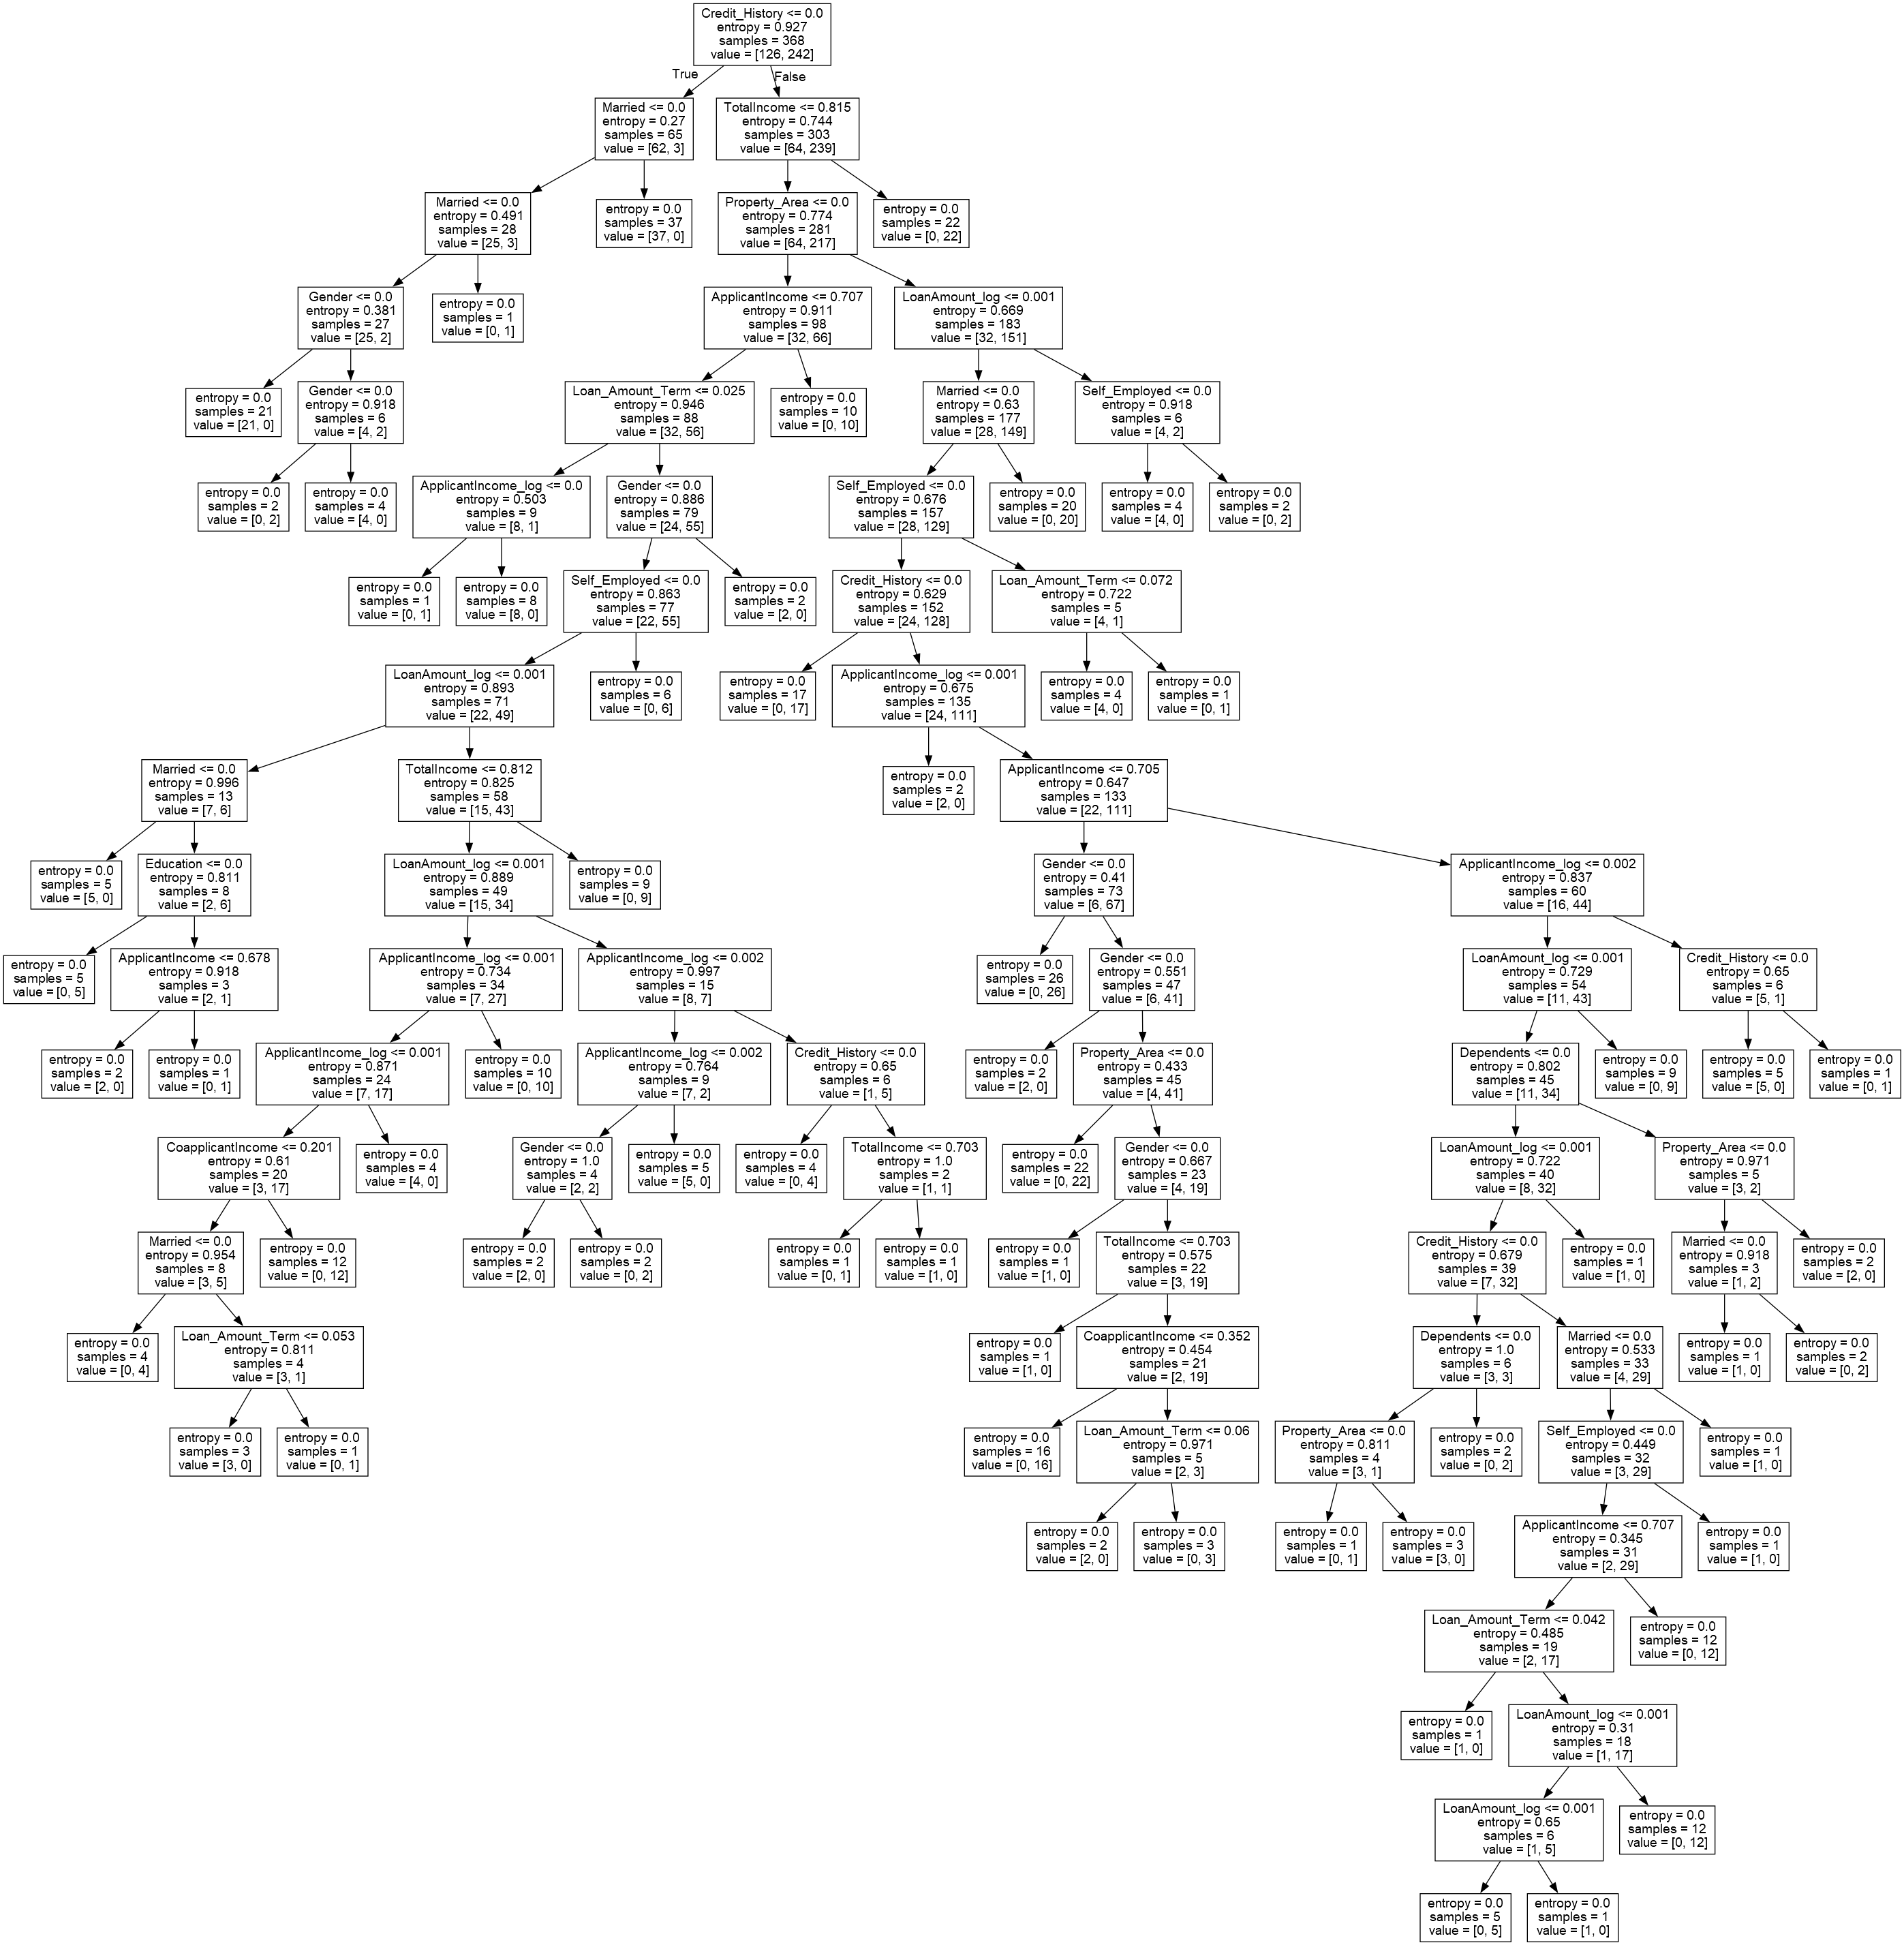

In [109]:
from cairosvg import svg2png
from IPython.display import Image
 
 
svg2png(bytestring=graph.pipe(format='svg'),write_to='output.png')
Image("output.png")

# Report:

Q6. Based on the feature importance, select a different set of features to build another decision tree model. You
should aim to improve the result of the baseline model.

The feautures I am selecting are: Credit_History, LoanAmount_log,  TotalIncome

In [110]:
columns = list(normalized_data.columns)
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'ApplicantIncome_log',
 'TotalIncome',
 'Loan_ID',
 'Loan_Status']

In [111]:
features = normalized_data.drop(['ApplicantIncome', 'Loan_ID','Loan_Status','Gender','Married', 'Dependents', 'Education', 'CoapplicantIncome','Loan_Amount_Term', 'Self_Employed', 'Property_Area', 'ApplicantIncome_log'], axis = 1) 
classes = pd.DataFrame(normalized_data['Loan_Status'])

In [112]:
print('Features:')
print(features.head())
print('Classes:')
print(classes.head())

Features:
   Credit_History  LoanAmount_log  TotalIncome
0        0.000168        0.000842     0.814088
1        0.000073        0.000344     0.706863
2        0.000136        0.000687     0.706255
3        0.000219        0.000918     0.756229
4        0.000171        0.000812     0.705763
Classes:
   Loan_Status
0            1
1            1
2            1
3            0
4            1


In [113]:
from matplotlib import pyplot

In [114]:
x_train, x_test, y_train, y_test = train_test_split(features, classes,  test_size= .33, 
                                                    random_state = 46)
print(x_train.shape, x_test.shape)

(368, 3) (182, 3)


In [115]:
decisionTree = DecisionTreeClassifier(criterion='entropy')
print(decisionTree)

DecisionTreeClassifier(criterion='entropy')


In [116]:
dtc_model2 = decisionTree.fit(x_train, y_train)

Feature: 0, Score: 0.44795
Feature: 1, Score: 0.21494
Feature: 2, Score: 0.33711


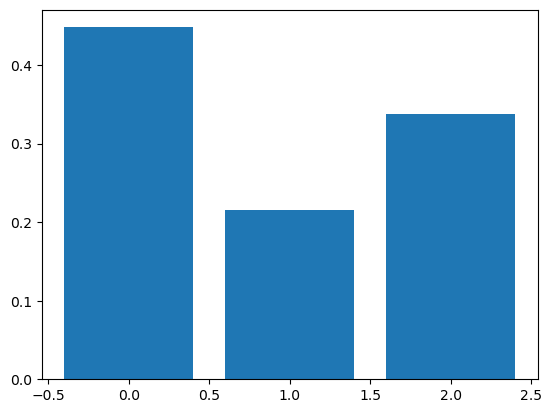

In [117]:
# feature importance
importance = dtc_model2.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Barchat for feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [118]:
prediction = dtc_model2.predict(x_test)

In [119]:
y_true = le.inverse_transform(y_test["Loan_Status"])
y_pred = le.inverse_transform(prediction)

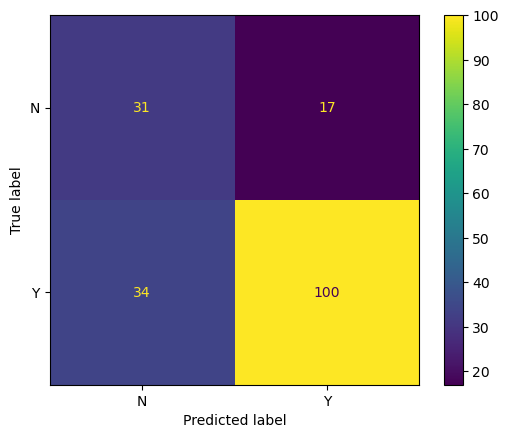

In [120]:
cm = confusion_matrix(y_true, y_pred)
labels = ['N', 'Y']
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [121]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           N       0.48      0.65      0.55        48
           Y       0.85      0.75      0.80       134

    accuracy                           0.72       182
   macro avg       0.67      0.70      0.67       182
weighted avg       0.76      0.72      0.73       182



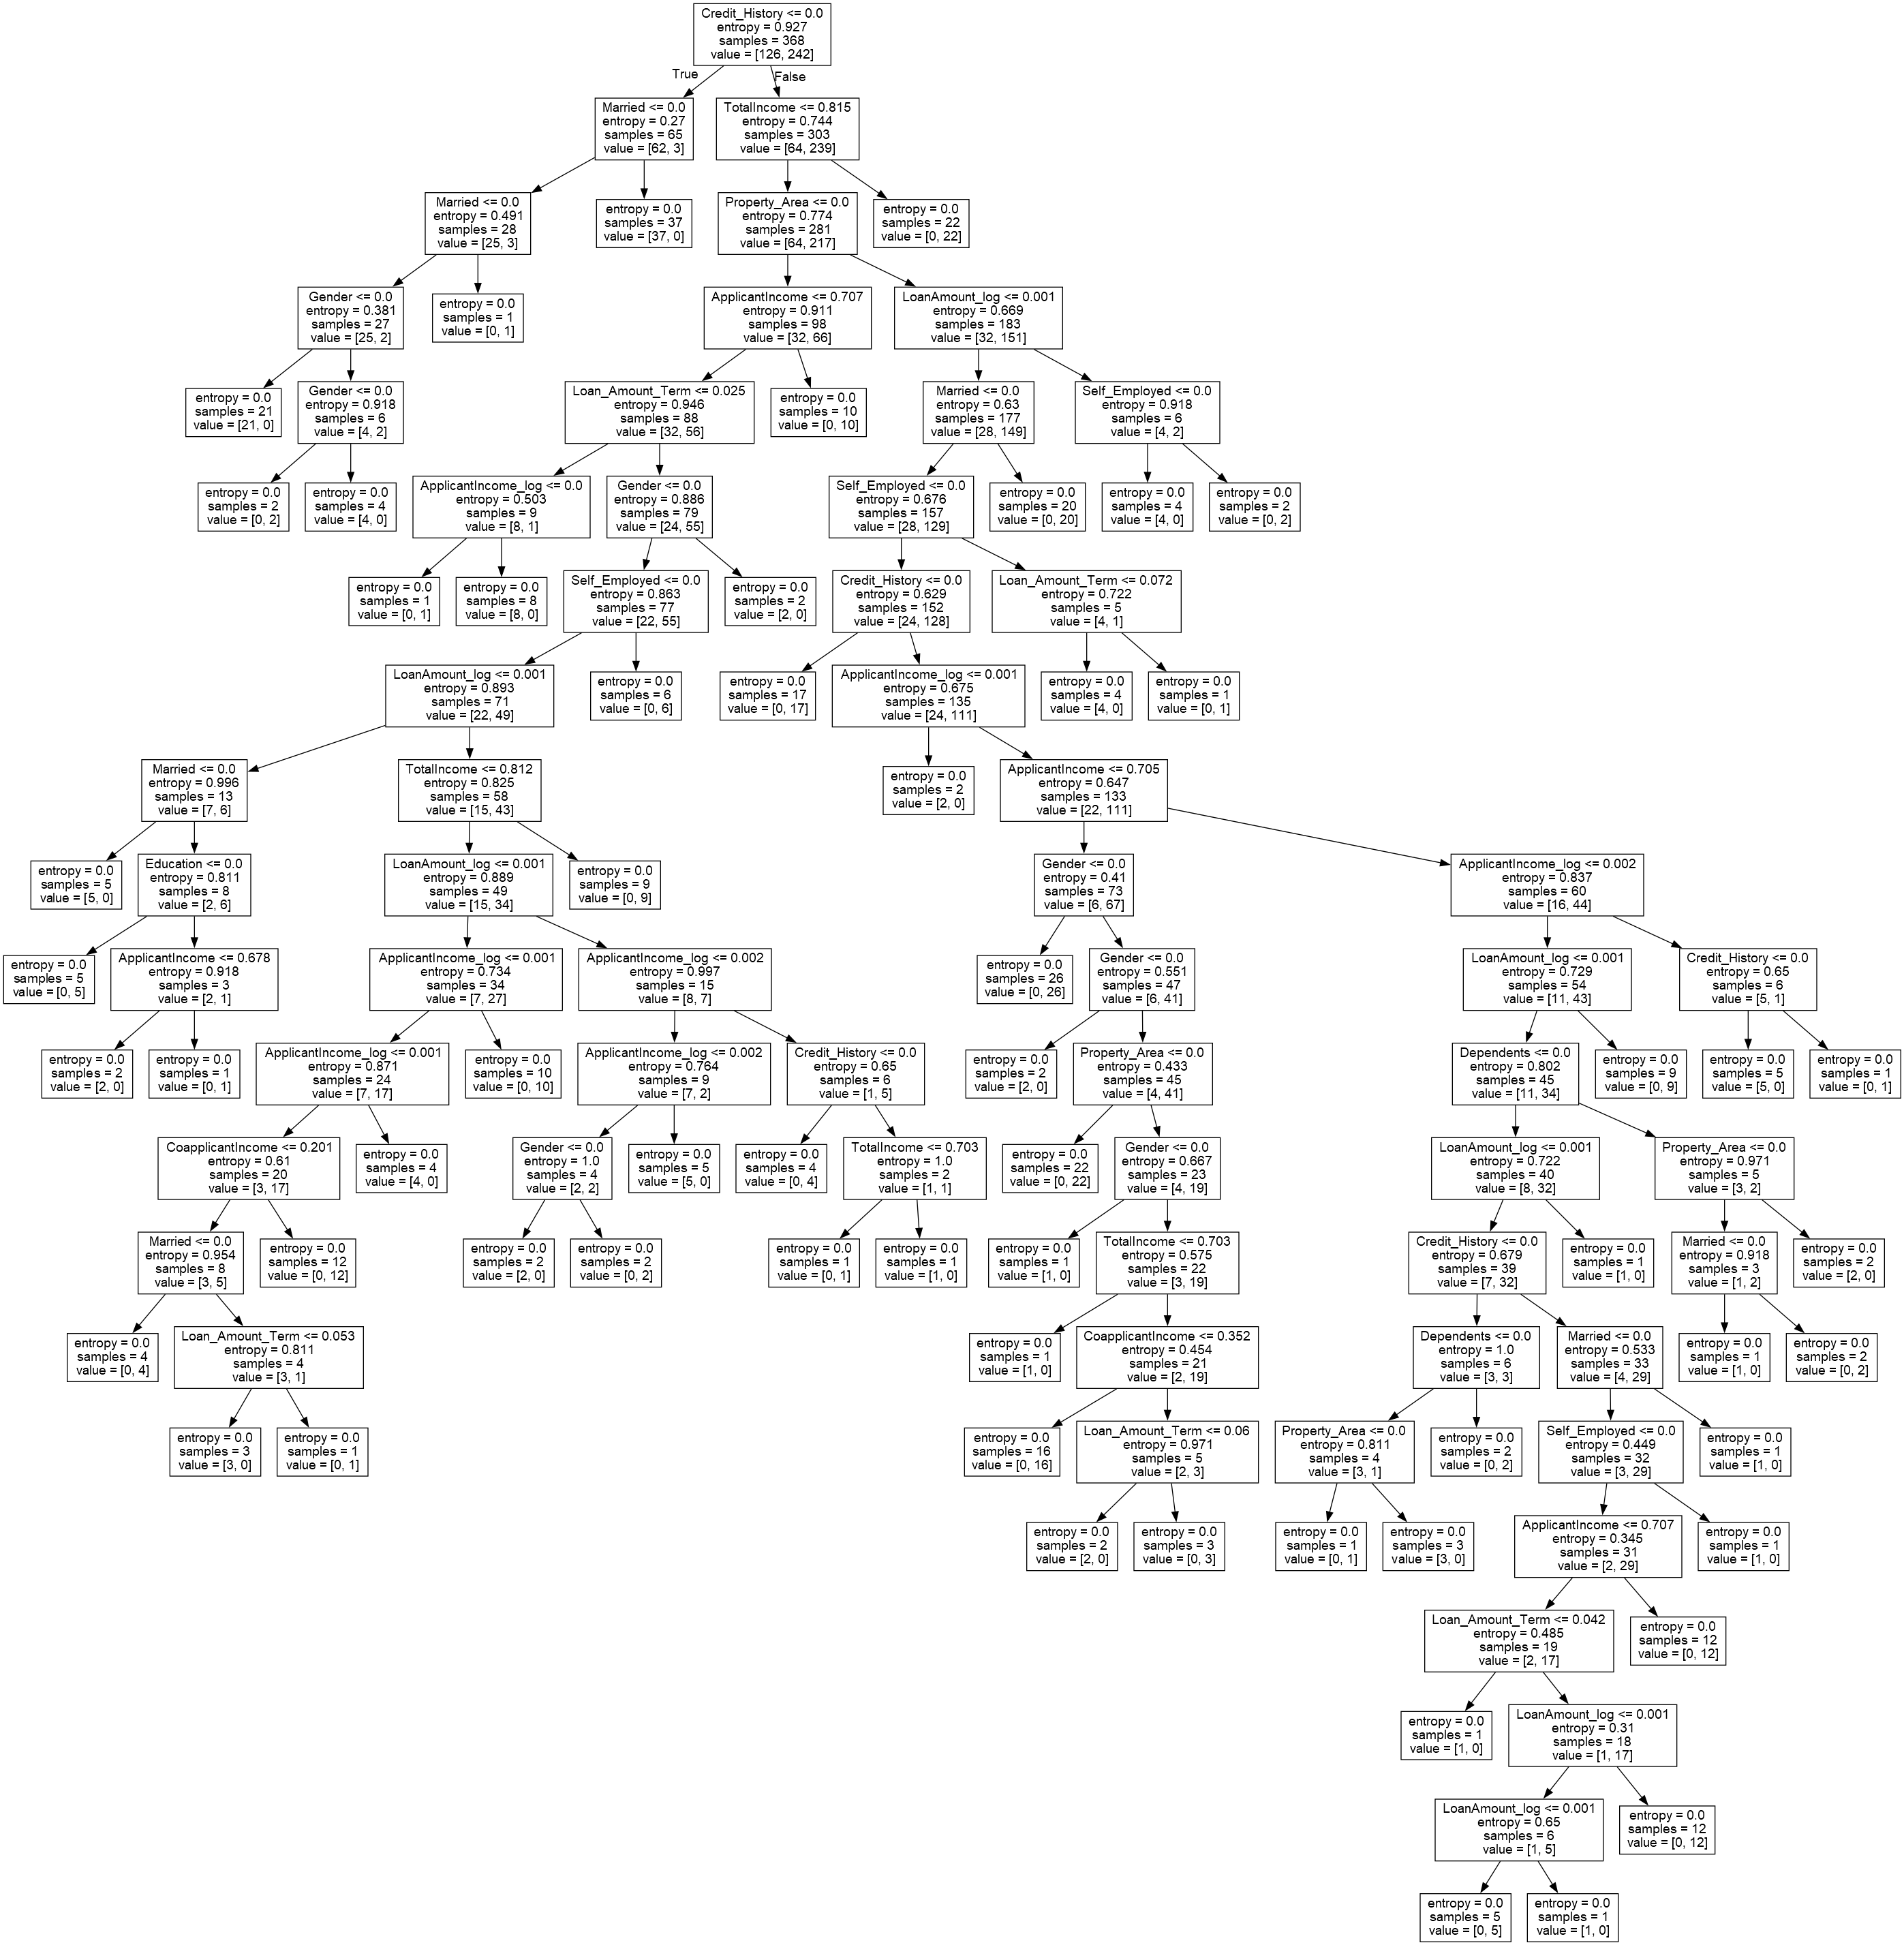

In [122]:
svg2png(bytestring=graph.pipe(format='svg'),write_to='output2.png')
Image("output2.png")

## Q7. Write a summary (max 250 words) to compare both the models. The summary should include: idea behind selecting those particular features and comparative analysis of the results of both the models.

In the first model (dtc_model), all eleven features in the dataset were considered. However, in the second model (dtc_model2), I selected three features that I deemed crucial in making informed decisions when granting loans to applicants. These features include Credit History, Loan Amount, and Total Income. It is vital to determine total income to ensure they are capable of repaying the loan. Furthermore, the loan amount should also be taken into consideration to ensure that it is within their means to repay based on their income. Lastly, Credit History provides a record of how an applicant has managed their credit in the past, including their total debt and payment timeliness.
The bar chart of importance in In[124] also reiterates that Credit History is the most important followed by the Total income.

The first classification report shows an overall accuracy of 70%, with a precision of 0.73, recall of 0.70, and F1-score of 0.71. The precision, recall, and F1-score for class 'N' (not approved) are lower than those of class 'Y' (approved). This means that the model has difficulty in identifying the negative class, and it tends to misclassify a significant number of negative examples as positive. The macro-average F1-score of 0.65 indicates that the model's performance is suboptimal in terms of class imbalance, and there is room for improvement.

The second classification report shows an overall accuracy of 70%, which is the same as the previous report. However, the precision, recall, and F1-score for class 'N' have improved significantly, and the model now correctly identifies a higher percentage of negative examples. The precision, recall, and F1-score for class 'Y' are still high, indicating that the model is good at identifying the positive examples. The macro-average F1-score has also improved to 0.66, indicating a better balance between the two classes.

In conclusion, the second model with the reduced feature set performs better than the first model. However, the overall performance of both models is still suboptimal, and there is room for improvement in terms of identifying the negative class.

# Q8. Discuss the result based on the evaluation matrix (max 250 words).

The two confusion matrices from Out[104] and Out[128] represents the performance of a machine learning model in the prediction of well the model is handling its prediction. The rows in the matrix correspond to the actual class labels, while the columns correspond to the predicted class labels.

In the first confusion matrix, we can see that the first model correctly predicted the negative class(Not granted loans) (N) 29 times, but incorrectly predicted it 19 times. Similarly, the model correctly predicted the positive class(Granted loans) (Y) 98 times, but incorrectly predicted it 36 times. Overall, this confusion matrix suggests that the model is better at predicting the positive class than the negative class, as evidenced by the higher number of True Positives and False Negatives.

In the second confusion matrix, we can see that the second model correctly predicted the negative class(not granted) 31 times, but incorrectly predicted it 17 times. Similarly, the model correctly predicted the positive class(Granted loans) 97 times, but incorrectly predicted it 37 times. Compared to the first confusion matrix, this matrix suggests that the second model is slightly better at predicting the negative class than the first model, as evidenced by the higher number of True Negatives and lower number of False Negatives.

Overall, based on the two confusion matrices, we can conclude that the second machine learning model performed slightly better than the first one in terms of predicting the negative class.

# References

Syed Nor, S.H., Ismail, S. and Yap, B.W., 2019. Personal bankruptcy prediction using decision tree model. Journal of Economics, Finance and Administrative Science, 24(47), pp.157-170.

Cho, S., Hong, H. and Ha, B.C., 2010. A hybrid approach based on the combination of variable selection using decision trees and case-based reasoning using the Mahalanobis distance: For bankruptcy prediction. Expert Systems with Applications, 37(4), pp.3482-3488.